*Orientações:*

Esse arquivo contem o modelo esperado de respostas para a NAC 3. Podem ser acrescentadas algumas outras informações ou trechos com códigos, entretanto não esqueçam de responder todos os pontos que foram levantados a seguir

*   Fazer a NAC em grupos do Challenge;
*   Entregar até o dia 17/05/2022 via TEAMS;
*   Utilizar o conjunto de dados NAC3.csv para fazer a atividade;
*   Entregar esse arquivo com a sua resolução via TEAMS



**NAC 3 - Inteligência Artificial e Computacional**

Algoritmos de Regressão

---


Nomes:

[Colocar nome e RM dos integrantes do grupo]

## Exercício NAC-3

Importar suas bibliotecas aqui:

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np
from collections import Counter

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

1. Carregar os dataset do exercício:

In [ ]:


from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1-HC1-HsKIgZIDM9wUYP7_rTWu4HfGqHz'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './NAC3.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("NAC3.csv", sep = ',')



Os atributos desse conjunto de dados são:

*    model: modelo do veículo;
*    engine_power: potência do motor;
*    transmission: tipo da transmissão do carro;
*    age_in_days: quantidade de dias desde a fabricação do carro;
*    km: quantidade de quilometros que o veículo já percorreu;
*    previous_owners: Quantidade de donos anteriores do veículo;
*    lat: latitude do vendedor (os carros podem variar seu preço de acordo com sua localização)
*    lon: longitude do vendedor (os carros podem variar seu preço de acordo com sua localização)
*    price: preço de vendo do veículo (target da nossa NAC)

2. Fazer a análise exploratória dos dados 

Responda aos seguintes itens:

a) Verificação os tipos de dados envolvidos;

b) Verificar as médias, desvios padrões e distribuição dos dados

c) Checar por valores nulos no conjunto de dados (e se existir, tratá-los)

d) Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)

e) Verificar via heatmap com a correlação de Pearson a relação entre os atributos

In [ ]:
dados.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [ ]:
dados.describe()

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [ ]:
dados.groupby("model").size()

model
lounge    212
pop       102
sport      65
star        1
dtype: int64

In [ ]:
dados.groupby("transmission").size()

transmission
automatic     25
manual       355
dtype: int64

In [ ]:
dados.shape

(380, 9)

In [ ]:
One_Hot = pd.get_dummies(dados['transmission'], prefix = 'trans')
One_Hot

,trans_automatic,trans_manual
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
375,0,1
376,0,1
377,0,1
378,1,0


In [ ]:
dados = pd.concat([dados,One_Hot],axis =1)

In [ ]:
One_Hot2 = pd.get_dummies(dados['model'], prefix = 'modelo')
One_Hot2

,modelo_lounge,modelo_pop,modelo_sport,modelo_star
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
375,1,0,0,0
376,1,0,0,0
377,1,0,0,0
378,0,1,0,0


In [ ]:
dados = pd.concat([dados,One_Hot2],axis =1)


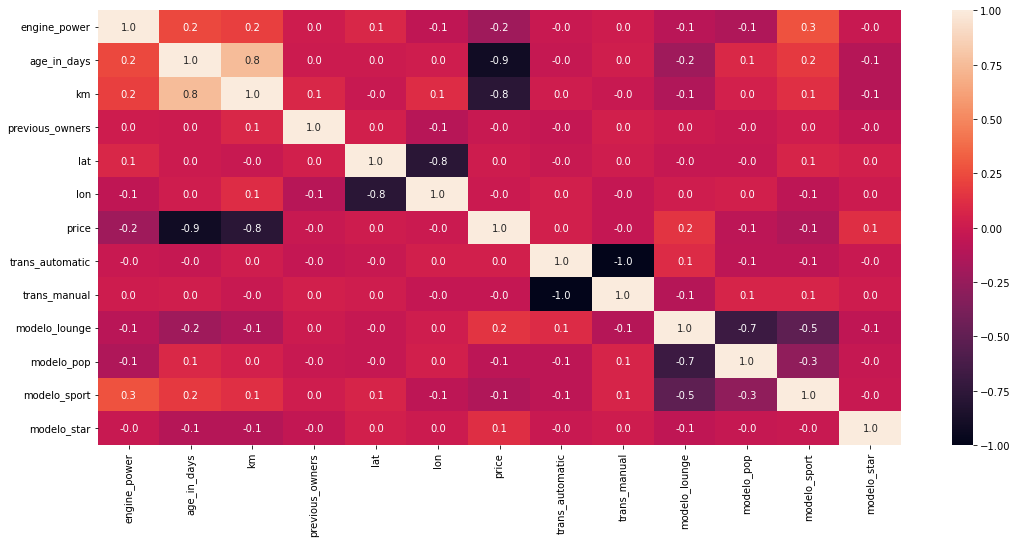

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(dados.corr(method = 'pearson'), annot=True, fmt=".1f")

3. Dividir os dados em conjunto de treinamento e teste e treinar dois modelos distintos de regressão.

In [ ]:
X = dados.drop(columns=['price','model','transmission']).values
y = dados['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)

scale = MinMaxScaler().fit(X_train)


X_train = scale.transform(X_train)
X_test = scale.transform(X_test)





In [ ]:
clf_Arvore_Decisao = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)
clf_Arvore_Decisao.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [ ]:
y_pred_AD = clf_Arvore_Decisao.predict(X_test)
y_pred_AD

array([4900, 4900, 5000, 5200, 8980, 3300, 9900, 4900, 4500, 4500, 4900,
       5000, 4490, 4900, 4900, 5100, 4900, 9900, 4900, 8299, 3900, 5100,
       4600, 4900, 3950, 5200, 3950, 9590, 4900, 5990, 5000, 5300, 9900,
       4500, 5000, 4400, 4900, 4500, 4900, 5000, 4500, 5400, 3950, 8980,
       4490, 5990, 4900, 5990, 8299, 4490, 9590, 5200, 5200, 3300, 5100,
       4990, 4500, 9590, 4000, 4490, 8299, 4900, 4900, 4200, 4500, 9890,
       5300, 5400, 4600, 5000, 5100, 4490, 9890, 4600, 9590, 9890, 9890,
       5000, 5990, 4200, 4900, 4900, 5100, 5000, 4600, 9900, 9590, 4900,
       3950, 8299, 4500, 4000, 4200, 4900, 4900, 4990, 5000, 4500, 4500,
       4500, 5200, 4490, 4990, 4500, 4490, 4900, 4990, 5100, 5990, 5000,
       5000, 5200, 4900, 4490, 4990, 4600, 4900, 4500, 4900, 3300, 4900,
       4490, 3650, 4500, 3650, 4990])

In [ ]:
mean_squared_error(y_pred_AD,y_test)

1775102.3095238095

In [ ]:
mean_absolute_error(y_pred_AD,y_test)

813.9761904761905

In [ ]:
r2_score(y_pred_AD,y_test)

0.41313416708011574

In [33]:
clf_RFR = RandomForestRegressor(max_depth=3, n_estimators=100)
clf_RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [36]:
y_pred_RFR = clf_RFR.predict(X_test)
y_pred_RFR

array([ 4888.8746724 ,  4894.50695554,  4845.96506629,  9639.71317194,
        9687.7643289 ,  4661.71978987, 10321.49967581,  4915.37916294,
        4867.95870192,  5060.41225531,  4817.95384585,  4883.11205277,
        4864.12997208,  4714.93693671,  4892.1557555 ,  4904.88271472,
        4823.57373022,  9805.68400707,  4705.00552487, 10751.77624363,
        5654.923167  ,  4859.36017818,  4905.13799054,  5172.15214927,
        9804.09684507,  4900.77696867,  8297.98750564,  9805.68400707,
        5075.82030374, 10211.76754354,  4738.58679333,  4889.32726939,
        9883.53796184,  4703.01184239,  4894.71105986,  4964.88124075,
        4709.94034807,  4731.75788281,  4843.1571481 ,  4828.19501825,
        4842.71206807,  4915.37916294,  8263.9559267 ,  7145.96017118,
        4662.34363175,  5445.31939177,  4768.65136476,  9709.79552793,
        9744.20470552,  4791.47850412, 10121.46313038,  4915.37916294,
        4905.13799054,  4020.57146181,  4768.65136476,  4915.37916294,
      

4. Metricas de desempenho 

(Usar as métricas de desempenho para comparar os resultados)

MÉTRICAS ÁRVORES DE DECISÃO

In [ ]:
mean_squared_error(y_pred_AD,y_test)

1775102.3095238095

In [ ]:
mean_absolute_error(y_pred_AD,y_test)

813.9761904761905

In [ ]:
r2_score(y_pred_AD,y_test)

0.41313416708011574

Métricas Radom Forest

In [37]:
mean_squared_error(y_pred_RFR,y_test)

551234.4485374604

In [38]:
mean_absolute_error(y_pred_RFR,y_test)

506.27711790542673

In [39]:
r2_score(y_pred_RFR,y_test)

0.886867525458902

5. Conclusão

Qual dos modelos conseguiu o melhor desempenho?

O melhor dos modelos foi o RandomForestRegressor ele me da um r2_Score de 0.88 o que mais se aproxima de 1 diferente da DecisionTreeClassifier que me trás 0.41 diminuindo a performance do algoritimo